# Дифференцирование

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html#matplotlib.pyplot.axhline
* https://numpy.org/doc/stable/reference/generated/numpy.log1p.html#numpy.log1p
* https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html
* https://en.wikipedia.org/wiki/Finite_difference
* https://pythonnumericalmethods.berkeley.edu/notebooks/chapter20.02-Finite-Difference-Approximating-Derivatives.html
* https://en.wikipedia.org/wiki/Gradient_descent
* https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
* https://zhang-yang.medium.com/the-gradient-argument-in-pytorchs-backward-function-explained-by-examples-68f266950c29

## Задачи для совместного разбора

1\. Дана функция $f(x) = x^2$. Найдите производную этой функции различными способами

In [ ]:
import sympy as sp

x = sp.symbols('x')
f = x**2

f_prime = sp.diff(f, x)

print("Производная (символьная):", f_prime)

Производная (символьная): 2*x


In [ ]:
def numerical_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h

f = lambda x: x**2

x_value = 2
f_prime_numerical = numerical_derivative(f, x_value)

print("Производная (численная):", f_prime_numerical)

Производная (численная): 4.000010000027032


In [ ]:
import autograd.numpy as np
from autograd import grad

def f(x):
    return x**2

f_prime = grad(f)

x_value = 2.0
result = f_prime(x_value)

print("Производная (автоматическая):", result)

Производная (автоматическая): 4.0


## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Дана функция $f(x)$. Найдите (аналитически) производную данной функции $f'(x)$ и реализуйте две этих функции. Постройте в одной системе координат графики $f(x)$, $f'(x)$ и $g(x) = 0$ на полуинтервале (0, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

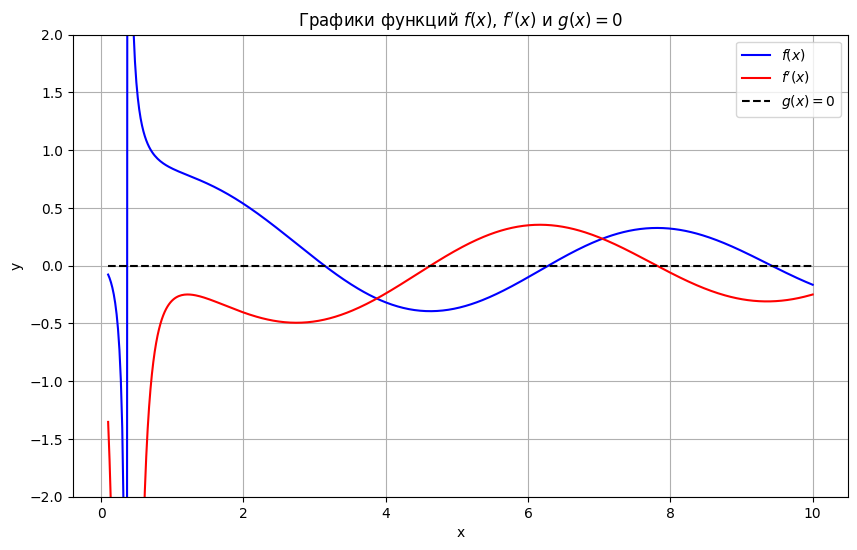

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x) / (np.log(x) + 1)

def f_prime(x):
    numerator = (x * (np.log(x) + 1) * np.cos(x)) - np.sin(x)
    denominator = x * (np.log(x) + 1)**2
    return numerator / denominator

x = np.linspace(0.1, 10, 500)

y_f = f(x)
y_f_prime = f_prime(x)
y_g = np.zeros_like(x)


plt.figure(figsize=(10, 6))
plt.plot(x, y_f, label="$f(x)$", color="blue")
plt.plot(x, y_f_prime, label="$f'(x)$", color="red")
plt.plot(x, y_g, label="$g(x) = 0$", color="black", linestyle="--")

plt.title("Графики функций $f(x)$, $f'(x)$ и $g(x) = 0$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.ylim(-2, 2)
plt.show()

<p class="task" id="2"></p>

2\. Дана функция $f(x)$. Найдите (используя символьные вычисления) производную данной функции $f'(x)$. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$ на полуинтервале (0, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [ ]:
import sympy as sp

x = sp.symbols('x')
f = sp.sin(x) / (sp.ln(x) + 1)

f_prime = sp.diff(f, x)

f_prime_simplified = sp.simplify(f_prime)

print("Производная f'(x):")
print(f_prime_simplified)

Производная f'(x):
(x*(log(x) + 1)*cos(x) - sin(x))/(x*(log(x) + 1)**2)


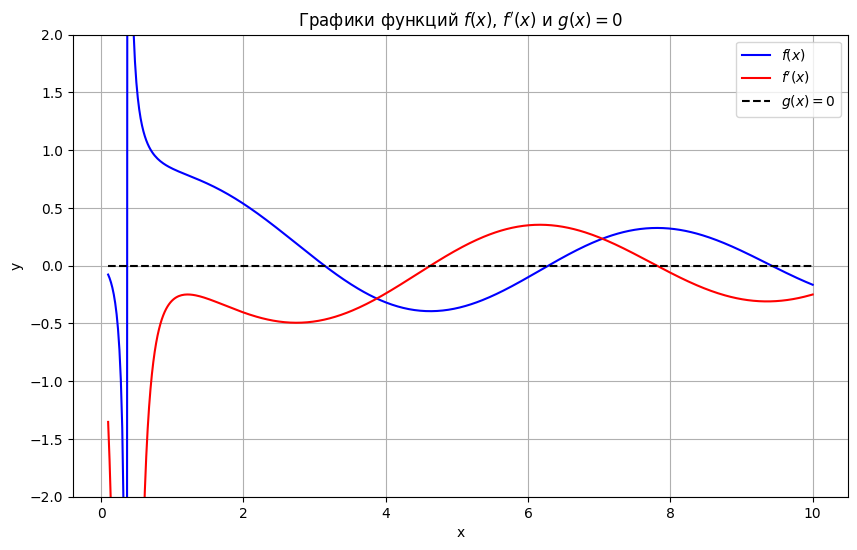

In [ ]:
f_numeric = sp.lambdify(x, f, 'numpy')
f_prime_numeric = sp.lambdify(x, f_prime_simplified, 'numpy')

x_vals = np.linspace(0.1, 10, 500)


y_f = f_numeric(x_vals)
y_f_prime = f_prime_numeric(x_vals)
y_g = np.zeros_like(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_f, label="$f(x)$", color="blue")
plt.plot(x_vals, y_f_prime, label="$f'(x)$", color="red")
plt.plot(x_vals, y_g, label="$g(x) = 0$", color="black", linestyle="--")

plt.title("Графики функций $f(x)$, $f'(x)$ и $g(x) = 0$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.ylim(-2, 2)
plt.show()

<p class="task" id="3"></p>

3\. Дана функция $f(x)$. Найдите (численно) производную данной функции $f'(x)$ на полуинтервале (0, 10]. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

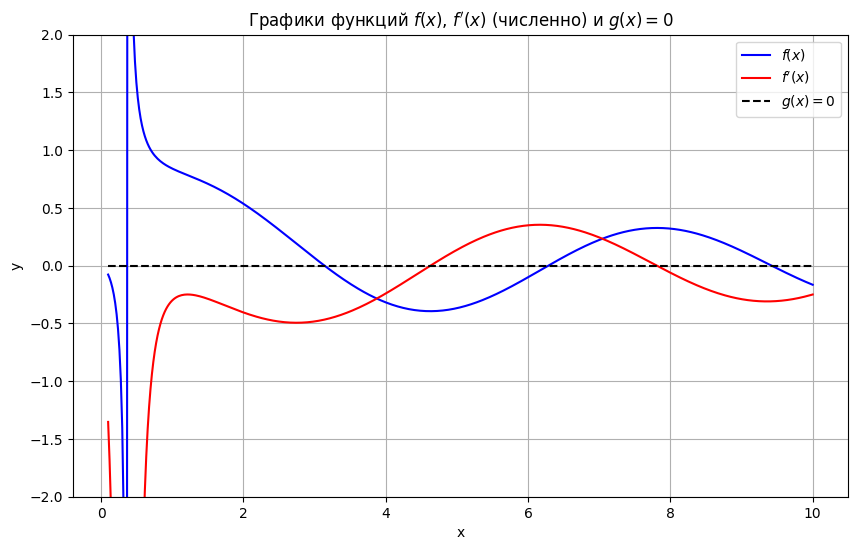

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x) / (np.log(x) + 1)

def numerical_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h


x_vals = np.linspace(0.1, 10, 500)


y_f = f(x_vals)
y_f_prime = np.array([numerical_derivative(f, x) for x in x_vals])
y_g = np.zeros_like(x_vals)


plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_f, label="$f(x)$", color="blue")
plt.plot(x_vals, y_f_prime, label="$f'(x)$", color="red")
plt.plot(x_vals, y_g, label="$g(x) = 0$", color="black", linestyle="--")


plt.title("Графики функций $f(x)$, $f'(x)$ (численно) и $g(x) = 0$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.ylim(-2, 2)
plt.show()

<p class="task" id="4"></p>

4\. Найдите локальный минимум функции $f(x)$ при помощи метода градиетного спуска. В качестве начальной точки используйте $x_0 = 4$. Найдите локальный максимум этой же функции, используя в качестве начальной точки $x_0'=9$.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [ ]:
import numpy as np

def f(x):
    return np.sin(x) / (np.log(x) + 1)

def numerical_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h

def gradient_descent_min(f, x0, learning_rate=0.01, tolerance=1e-6, max_iterations=10000):
    x = x0
    for i in range(max_iterations):
        grad = numerical_derivative(f, x)
        x_new = x - learning_rate * grad
        if abs(x_new - x) < tolerance:
            break
        x = x_new
    return x

def gradient_ascent_max(f, x0, learning_rate=0.01, tolerance=1e-6, max_iterations=10000):
    x = x0
    for i in range(max_iterations):
        grad = numerical_derivative(f, x)
        x_new = x + learning_rate * grad
        if abs(x_new - x) < tolerance:
            break
        x = x_new
    return x

x0_min = 4
x0_max = 9

local_min = gradient_descent_min(f, x0_min)
print(f"Локальный минимум: x = {local_min}, f(x) = {f(local_min)}")

local_max = gradient_ascent_max(f, x0_max)
print(f"Локальный максимум: x = {local_max}, f(x) = {f(local_max)}")

Локальный минимум: x = 4.626978150813516, f(x) = -0.393519942595352
Локальный максимум: x = 7.812416490665096, f(x) = 0.32697306988141406


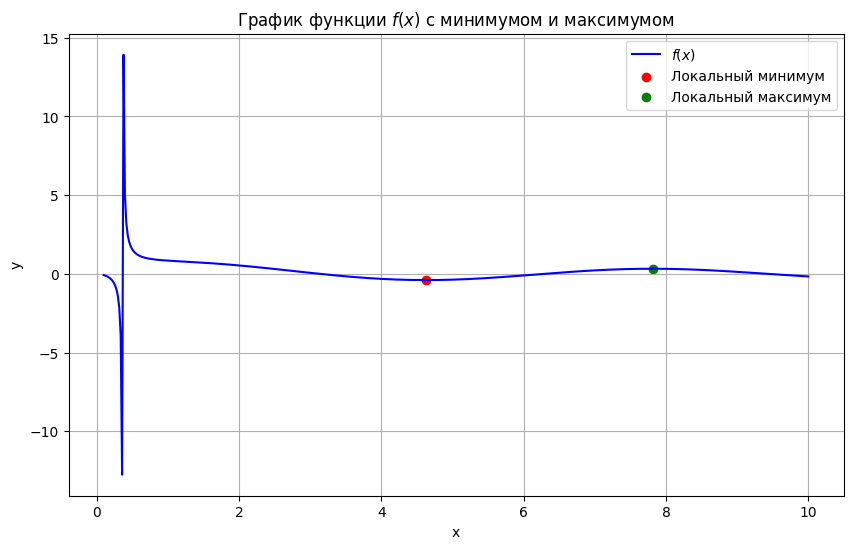

In [ ]:
import matplotlib.pyplot as plt

x_vals = np.linspace(0.1, 10, 500)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="$f(x)$", color="blue")
plt.scatter([local_min], [f(local_min)], color="red", label="Локальный минимум")
plt.scatter([local_max], [f(local_max)], color="green", label="Локальный максимум")
plt.title("График функции $f(x)$ с минимумом и максимумом")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

<p class="task" id="5"></p>

5\. Дана функция $f(x)$. Найдите (используя возможности по автоматическому дифференцированию пакета `torch`) производную данной функции $f'(x)$ на отрезке [0, 10]. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$ на полуинтервале (0, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

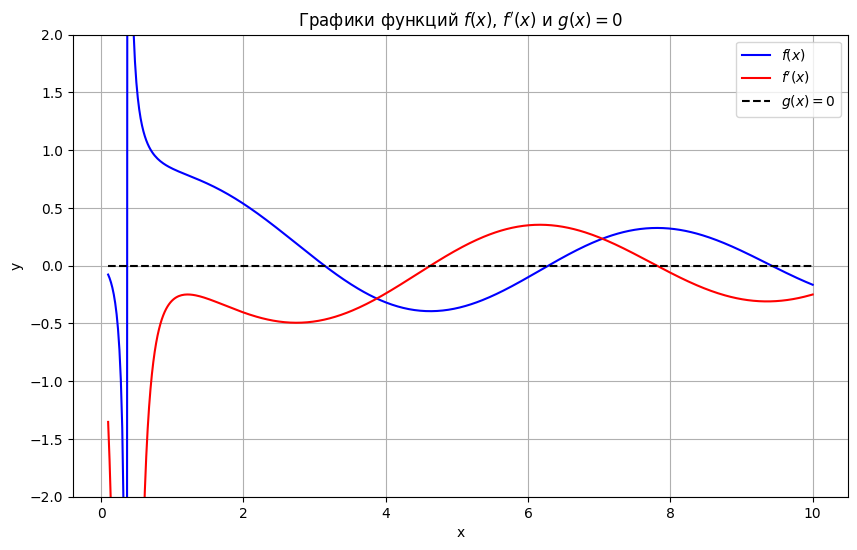

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return torch.sin(x) / (torch.log(x) + 1)

x_vals = np.linspace(0.1, 10, 500)
x_torch = torch.tensor(x_vals, requires_grad=True)

y_f = f(x_torch)

y_f_prime = []
for i in range(len(x_torch)):
    y_f[i].backward(retain_graph=True)
    y_f_prime.append(x_torch.grad[i].item())
    x_torch.grad.zero_()

y_f = y_f.detach().numpy()
y_f_prime = np.array(y_f_prime)
y_g = np.zeros_like(x_vals)


plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_f, label="$f(x)$", color="blue")
plt.plot(x_vals, y_f_prime, label="$f'(x)$", color="red")
plt.plot(x_vals, y_g, label="$g(x) = 0$", color="black", linestyle="--")


plt.title("Графики функций $f(x)$, $f'(x)$ и $g(x) = 0$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.ylim(-2, 2)
plt.show()

<p class="task" id="6"></p>

6\. Дана функция $f(x)$. Найдите производную данной функции $f'(x)$ на отрезке [0, 10] при помощи формулы производной сложной функции. На этом же отрезке найдите, используя возможности по автоматическому дифференцированию пакета `torch`. Сравните результаты.

$$f(x) = sin(cos(x))$$

Максимальное отклонение между аналитической и автоматической производными:
1.1102230246251565e-16


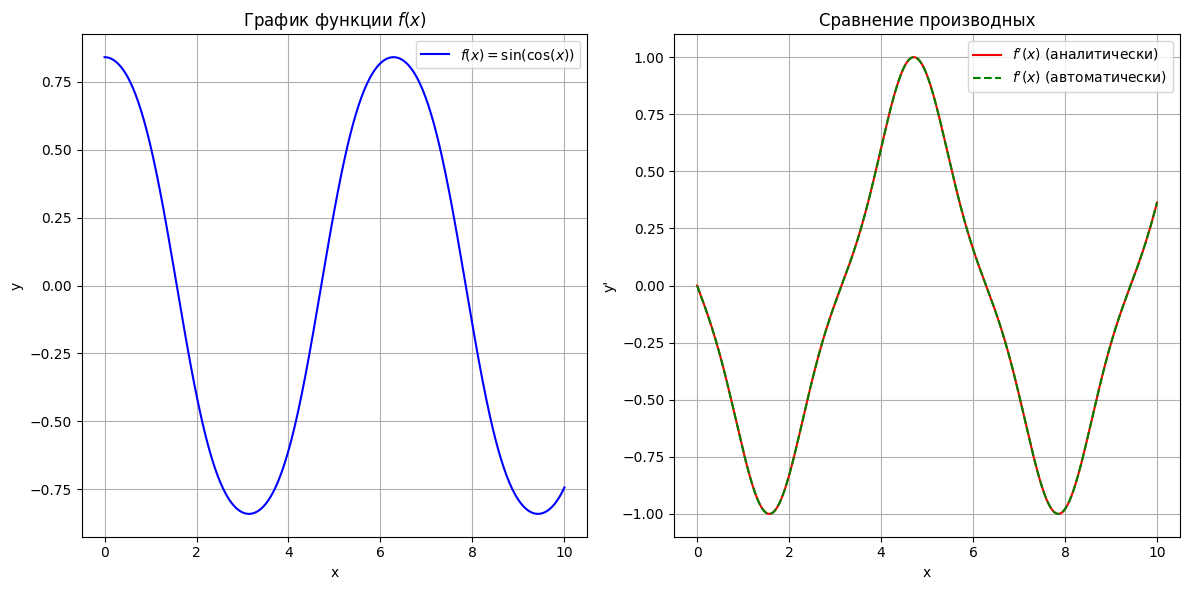

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt


def f_analytical(x):
    return np.sin(np.cos(x))

def f_prime_analytical(x):
    return -(np.cos(np.cos(x)) * np.sin(x))


x_vals = np.linspace(0, 10, 500)
x_torch = torch.tensor(x_vals, requires_grad=True)


y_f_torch = torch.sin(torch.cos(x_torch))

y_f_prime_torch = []
for i in range(len(x_torch)):
    y_f_torch[i].backward(retain_graph=True)
    y_f_prime_torch.append(x_torch.grad[i].item())
    x_torch.grad.zero_()


y_f_torch = y_f_torch.detach().numpy()
y_f_prime_torch = np.array(y_f_prime_torch)


y_f_prime_analytical = f_prime_analytical(x_vals)

print("Максимальное отклонение между аналитической и автоматической производными:")
print(np.max(np.abs(y_f_prime_analytical - y_f_prime_torch)))


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_vals, y_f_torch, label="$f(x) = \\sin(\\cos(x))$", color="blue")
plt.title("График функции $f(x)$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_vals, y_f_prime_analytical, label="$f'(x)$ (аналитически)", color="red")
plt.plot(x_vals, y_f_prime_torch, label="$f'(x)$ (автоматически)", color="green", linestyle="--")
plt.title("Сравнение производных")
plt.xlabel("x")
plt.ylabel("y'")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Обратная связь
- [ ] Хочу получить обратную связь по решению